# Car Price Prediction Using Multi Linear Regression
This work represent the car price prediction using multi linear regression from several features obtained from Kaggle <br><br>
by: <br>
Lathief Nurmahmudi WIjaya <br>
20/456099/TK/50229

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Getting dataset from Kaggle
dataset = pd.read_csv('CarPrice_Assignment.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Spearating dependent and independent features

# Dependent feature : price
y = np.asarray(dataset['price'].values.tolist())

# Independent features : fueltype,aspiration,doornumber,carbody,
                    # drivewheel,enginelocation,wheelbase,carlength,
                    # carwidth,carheight,curbweight,enginetype,cylindernumber,
                    # enginesize,fuelsystem,boreratio,stroke,
                    # compressionratio,horsepower,peakrpm,citympg,highwaympg
                
# Getting independent features only
dataset.drop(['car_ID','symboling','CarName','price'], axis = 1, inplace = True)
dataset.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [4]:
# Handling categorical features using One Hot Encoding
for i in [0,1,2,3,4,5,11,12,14]:
    print(dataset.iloc[:,i].value_counts())
    print("\n")

gas       185
diesel     20
Name: fueltype, dtype: int64


std      168
turbo     37
Name: aspiration, dtype: int64


four    115
two      90
Name: doornumber, dtype: int64


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


front    202
rear       3
Name: enginelocation, dtype: int64


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64




In [5]:
# Selecting several categorical features
# Performing One Hot Encoding for fueltype column
dataset["fueltype: gas"] = dataset.iloc[:,0]
dataset.loc[dataset["fueltype: gas"]!="gas", "fueltype: gas"] = 0
dataset.loc[dataset["fueltype: gas"]=="gas", "fueltype: gas"] = 1

dataset["fueltype: diesel"] = dataset.iloc[:,0]
dataset.loc[dataset["fueltype: diesel"]!="diesel", "fueltype: diesel"] = 0
dataset.loc[dataset["fueltype: diesel"]=="diesel", "fueltype: diesel"] = 1

# Performing One Hot Encoding for aspiration column
dataset["aspiration: std"] = dataset.iloc[:,1]
dataset.loc[dataset["aspiration: std"]!="std", "aspiration: std"] = 0
dataset.loc[dataset["aspiration: std"]=="std", "aspiration: std"] = 1

dataset["aspiration: turbo"] = dataset.iloc[:,1]
dataset.loc[dataset["aspiration: turbo"]!="turbo", "aspiration: turbo"] = 0
dataset.loc[dataset["aspiration: turbo"]=="turbo", "aspiration: turbo"] = 1

In [6]:
# Delete unused features
dataset.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis = 1, inplace = True)
dataset.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype: gas,fueltype: diesel,aspiration: std,aspiration: turbo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,1,0


In [7]:
# Get the final independent features
X = np.asarray(dataset.values.tolist())

# Shape of X and y
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (205, 17)
Shape of y:  (205,)


In [8]:
# Adding intercept
X = np.concatenate((X,np.ones((205,1))), axis = 1)

In [9]:
# Visualing X
print("X: ", X)
print("y: ", y)

X:  [[ 88.6 168.8  64.1 ...   1.    0.    1. ]
 [ 88.6 168.8  64.1 ...   1.    0.    1. ]
 [ 94.5 171.2  65.5 ...   1.    0.    1. ]
 ...
 [109.1 188.8  68.9 ...   1.    0.    1. ]
 [109.1 188.8  68.9 ...   0.    1.    1. ]
 [109.1 188.8  68.9 ...   0.    1.    1. ]]
y:  [13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400. 

In [10]:
# This "split_data" method splits the given dataset into trainset and testset
def split_data(X,y,test_size=0.25,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [11]:
# Main algorithm of Multiple Linear Regression
class Multiple_Linear_Regression():   
    def __init__ (self):
        self.theta=np.zeros(int(np.random.random()),float)[:,np.newaxis]; 
    
    def fit(self, X_train, y_train):
#         Fit data to the model based on the matrix approach to Linear Regression. Actual magic happens here!  
        X_b = np.c_[np.ones(len(X_train)), X_train] 
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
    
    def predict(self, X_test):
#         Fucntion to predict on new data.
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)
        
        return y_predict

In [12]:
# Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

# Defining model
model = Multiple_Linear_Regression()

#Training 
model.fit(X_train, y_train)

# Getting prediction
y_preds = model.predict(X_test)

In [13]:
# Measuring performance by the error
def mse(y_preds, y):
#     Mean squared error.
    mse = ((y - y_preds)**2).mean()
    return mse

def rmse(y_preds, y):
#     Root Mean squared error.
    rmse = (((y - y_preds)**2).mean())**(1/2)
    return rmse

def r2(y_preds, y):
#     R square score.
    ssr = sum((y - y_preds) ** 2) 
    sst = sum((y - y.mean()) ** 2) 
    return 1 - ssr/sst

In [14]:
# Printing error and R
mse(y_preds, y_test), rmse(y_preds, y_test), r2(y_preds ,y_test)

(12601760.421360554, 3549.895832466152, 0.8324814865868458)

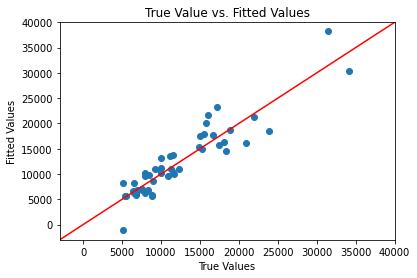

In [15]:
# Visualizing output
fig, ax = plt.subplots()

plt.xlim(-3000,40000)
plt.ylim(-3000,40000)
x_dummy = np.linspace(-3000,40000,100)
y_dummy = x_dummy
plt.plot(x_dummy,y_dummy, color='red')

ax.scatter(y_test, y_preds)
ax.set_xlabel('True Values')
ax.set_ylabel('Fitted Values')
ax.set_title('True Value vs. Fitted Values');

In [16]:
# Coefficient of regression
model.theta

array([-1.59864543e+04,  1.01697088e+02, -1.19481646e+02,  6.44462463e+02,
        1.14761054e+02,  2.91124157e+00,  9.18819881e+01, -6.96395267e+02,
       -2.97093159e+03,  2.57239800e+02,  4.52536455e+01,  2.05331572e+00,
       -4.08886278e+02,  2.87894762e+02, -8.57791158e+03, -7.40854279e+03,
       -7.62441785e+03, -8.36203650e+03, -1.59864543e+04])